# Saudi Arabia Used Cars

**[Source : Saudi Arabia Used Cars](https://drive.google.com/file/d/1yKxk5tn8F2FK1aO7Xj1AJe-gg7RaeajF/view?usp=sharing)*

### **Contents**

1. Business Problem
2. Data Understanding
3. Data Preprocessing
4. Feature Engineering
5. Modelling
6. Conclusion and Recommendation



## 1. Business Problems


**Context**

Berdasarkan Analisis Pasar Mobil Bekas Saudi Arabia yang didapat dari [Ken Research](https://www.kenresearch.com/white-paper/ksa-used-car-market.php). Pasar Mobil Bekas di Saudi Arabia telah mengalami pertumbuhan positif selama bertahun-tahun didukung oleh peningkatan populasi milenial di negara tersebut seiring dengan masuknya pemain baru ke pasar dengan *growth stage* 2500+ *dealership*. Meningkatnya tren mobil bekas dibandingkan mobil baru menunjukkan preferensi pembeli dalam membeli mobil bekas. Bisnis mobil bekas memiliki persaingan yang ketat,keberhasilan dalam bisnis ini membutuhkan keterampilan dan pengetahuan yang mendalam mengenai mobil. Para pemilik bisnis ini memperoleh mobil bekas yang berkualitas, melakukan perbaikan yang diperlukan, kemudian menjualnya dengan harga yang lebih tinggi. Para pemain ini bersaing berdasarkan parameter seperti *geographical presence*, *value-added services* yang ditawarkan, opsi pembiayaan, *after-sales services* , jaringan *dealership network* dan lainnya

Mobil bekas menjadi pilihan yang menarik karena harganya lebih terjangkau dibandingkan mobil baru. Namun, proses pembelian atau penjualan mobil bekas bisa menjadi tugas yang rumit dikarenakan terdapat banyak jenis mobil (berdasarkan merek, jenis transmisi, ukuran mesin, jarak tempuh, opsi, dan tahun), terutama saat menentukan harga pasar yang terbaik. Banyak orang yang tidak memiliki pengetahuan tentang tren pasar dan membutuhkan metode tepat untuk memberikan perkiraan harga berdasarkan data-data pasar yang tersedia.

**Problem Statement**

Isu utama dalam industri pasar mobil bekas adalah menentukkan harga mobil bekas untuk pembeli atau penjual agar harganya tidak terlalu tinggi untuk konsumen serta tidak terlalu rendah untuk penjual. Penentuan harga mobil bekas berdasarkan merek mobil,tahun, jenis transmisi dan mesin, serta faktor lainnya membutuhkan keahlian profesional yang memahami kondisi mobil dan harga yang sesuai berdasarkan pengalaman sebelumnya. Dalam hal ini, diperlukan sebuah model yang dapat memberikan perkiraan harga mobil bekas berdasarkan data historis yang ada. 

Model tersebut diharapkan memberikan kemudahan bagi pembeli dengan memberikan informasi tentang kualitas mobil, baik itu dalam kondisi yang sangat baik, baik, atau buruk. Di sisi lain, model ini juga dapat membantu para pelaku bisnis mobil bekas dalam menentukan harga jual yang kompetitif.



**Goal**

Sehubungan dengan hal itu, pasar industri mobil bekas memerlukan sebuah model untuk dapat prediksi harga mobil bekas yang dapat diandalkan bagi pengguna yang ingin membeli atau menjual mobil berdasarkan rincian seperti merk mobil, tahun dan jarak tempuh, etc. Sehingga jika seseorang ingin menjual mobilnya, kita dapat memberikan perkiraan harga berdasarkan tren pasar dan sesuai dengan spesifikasi mobil untuk membantu pengguna mengatasi kesulitan dalam menentukan harga yang kompetitif.

**Analytic Approach**

Kita perlu melakukan analisis data untuk dapat menemukan pola dari fitur-fitur yang ada, yang membedakan satu fitur dengan yang lainnya.

Selanjutnya, kita akan membangun suatu model regresi yang akan membantu pengguna untuk mendapatkan sebuah alat prediksi harga mobil bekas yang kompetitif dan bertujuan untuk menghindari harga mobil bekas yang *overprice* atau *underprice*.

**Evaluation Metric**

Evaluasi metrik yang akan kita gunakan adalah  RMSE (Root of Mean Squared Error), MSE (Mean Squared Error), dan MAPE (Mean Absolute Percentage Error) di mana RMSE adalah nilai rataan akar kuadrat dari error, MAE adalah rataan nilai absolut dari error, sedangkan MAPE adalah rataan persentase error yang dihasilkan oleh model regresi. Semakin kecil nilai RMSE, MAE, dan MAPE yang dihasilkan, berarti model semakin akurat dalam memprediksi harga sewa sesuai dengan limitasi fitur yang digunakan. Dan menggunakan nilai R-squared digunakan untuk mengetahui seberapa baik model dapat merepresentasikan varians keseluruhan data. Semakin mendekati 1, maka semakin fit pula modelnya terhadap data observasi. 

## 2. Data Understanding

Proses Data Understanding dan Cleaning merupakan tahap awal dalam pengolahan data yang bertujuan untuk memahami karakteristik dan kualitas data yang dimiliki, serta membersihkannya dari potensi kesalahan atau kekurangan. Langkah-langkah ini sangat penting untuk memastikan data yang digunakan dalam analisis atau model memiliki kualitas yang baik dan dapat diandalkan.

Sebelum melakukan analisa, kita ingin melihat anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*.


### DATA UNDERSTANDING

### Dataset


Dataset yang kita gunakan berisi 11 kolom yang terdiri dari:

- `Type` : Jenis mobil bekas

- `Region` : Wilayah tempat mobil bekas tersebut berada

- `Make` : Nama perusahaan pembuat mobil bekas

- `Gear_Type` : Jenis transmisi mobil bekas

- `Origin` : Asal mobil bekas

- `Options` : Pilihan-pilihan mobil bekas

- `Year` : Tahun pembuatan mobil bekas

- `Engine_Size` : Ukuran mesin mobil bekas

- `Mileage` : Jarak tempuh mobil bekas

- `Negotiable` : Status negosiasi mobil bekas

- `Price` : Harga mobil bekas

### Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

pd.options.display.float_format = '{:.1f}'.format


In [2]:
import os

df = pd.read_csv('data_saudi_used_cars.csv')
df.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0


In [3]:
import os
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (5624, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5624 entries, 0 to 5623
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         5624 non-null   object 
 1   Region       5624 non-null   object 
 2   Make         5624 non-null   object 
 3   Gear_Type    5624 non-null   object 
 4   Origin       5624 non-null   object 
 5   Options      5624 non-null   object 
 6   Year         5624 non-null   int64  
 7   Engine_Size  5624 non-null   float64
 8   Mileage      5624 non-null   int64  
 9   Negotiable   5624 non-null   bool   
 10  Price        5624 non-null   int64  
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 445.0+ KB


Dapat kita lihat dari data di atas bahwa terdapat data pada kolom `Price` yang memiliki nilai 0, dan itu tidak mungkin karena harga mobil tidak ada yang 0 seharusnya.

#### **Exploratory Data Analysis**

Kolom `Price` merupakan variabel yang kita targetkan untuk di analisa dengan kolom-kolom lainnya menjadi variabel independen. Variabel independen ini kemudian dibagi lagi menjadi variabel Kategorikal dan Numerikal.

Kita akan mengkategorikan kolom-kolom yang ada menjadi variabel dengan rincian sebagai berikut:

- **Numerical Variabels** : Price, Year, Mileage, Engine_Size.
- **Categorical Variabels** : Type, Region, Make, Gear_Type, Origin, Options, Negotiable

**NUMERICAL VARIABLES**

Kita akan menggunakan Pair Plot untuk menganalisa Numerical Values, karena Pair Plot dapat menampilkan grafik pasangan untuk semua variabel numerikal dan kita dapat melihat korelasi antara variabel numerikal tersebut

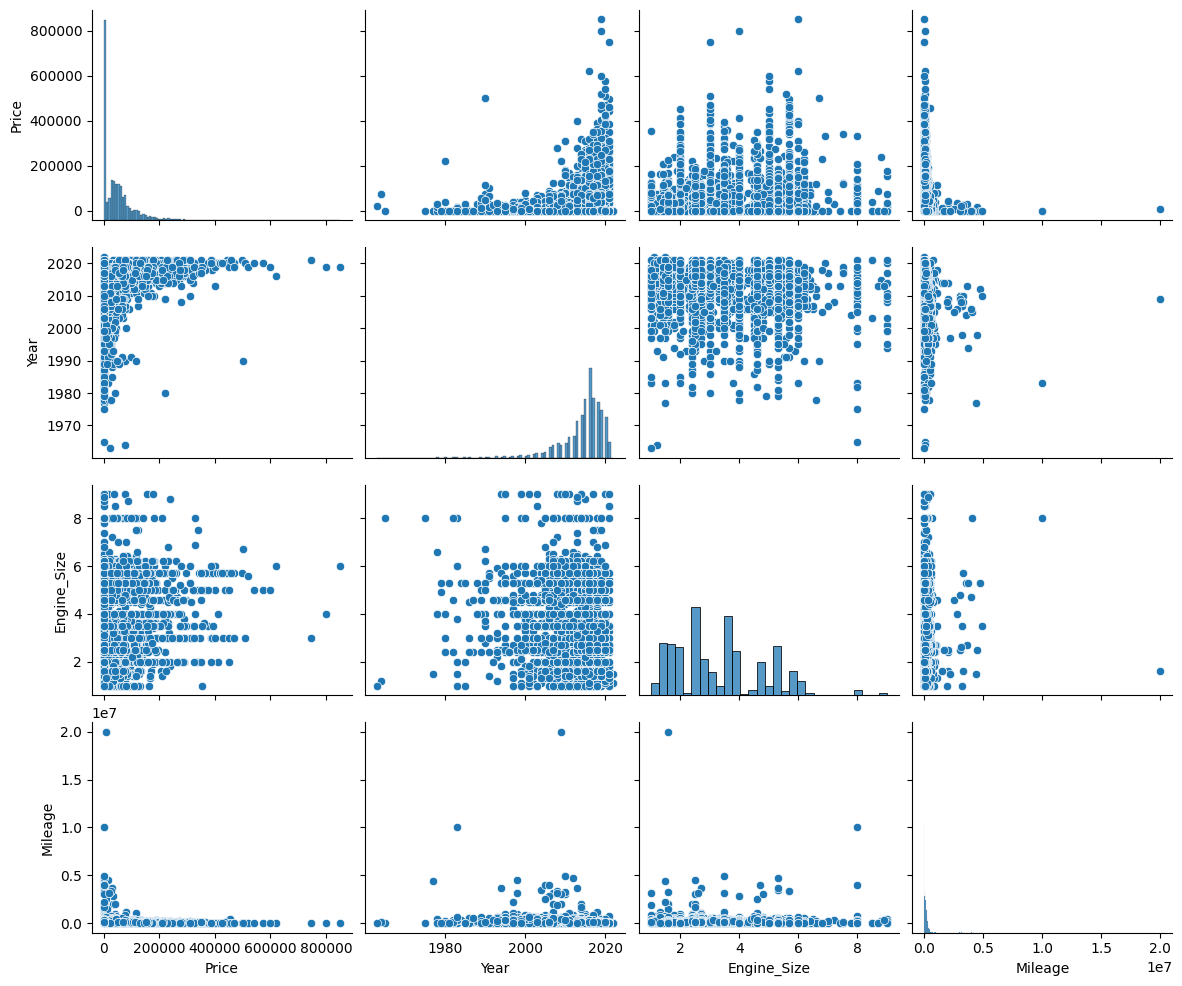

In [4]:
# Pairplot untuk numerical variables
sns.pairplot(df[['Price','Year','Engine_Size','Mileage']], aspect=1.2)

**Insight** : 

Seperti yang dapat kita lihat dari grafik Pairplot di atas, terdapat korelasi tinggi dan korelasi rendah diantara variabel-variabel tersebut satu sama lain:
- **Price** : Year (Korelasi Tinggi), Engine_Size (Korelasi Rendah), Mileage (Korelasi Rendah) 
- **Year** : Engine_Size (Korelasi Rendah), Mileage (Korelasi Tinggi), Price (Korelasi Tinggi)
- **Engine_Size** : Year (Korelasi Rendah), Mileage (Korelasi Rendah), Price (Korelasi Rendah)
- **Mileage** : Year (Korelasi Tinggi), Engine_Size (Korelasi Rendah), Price (Korelasi Rendah)

**CATEGORICAL VARIABLES**

Selanjutnya untuk Categorical Variables kita akan menganalisis nilai pada setiap kategori untuk mengeksplorasi kategori-kategori tersebut.

**Harga Berdasarkan Tipe dan Rata-rata Harga berdasarkan Region**

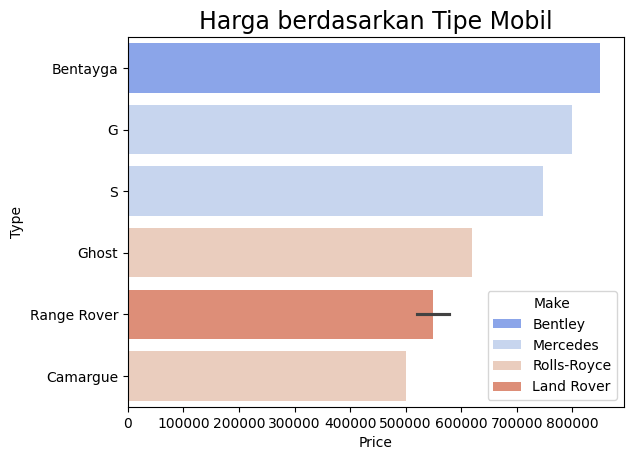

In [5]:
sns.barplot(
    x='Price',
    y='Type',
    hue='Make',
    data=df.nlargest(10, 'Price'),
    palette='coolwarm'
)
plt.title ('Harga berdasarkan Tipe Mobil', size = 17)
plt.show()

<Figure size 2000x1000 with 0 Axes>

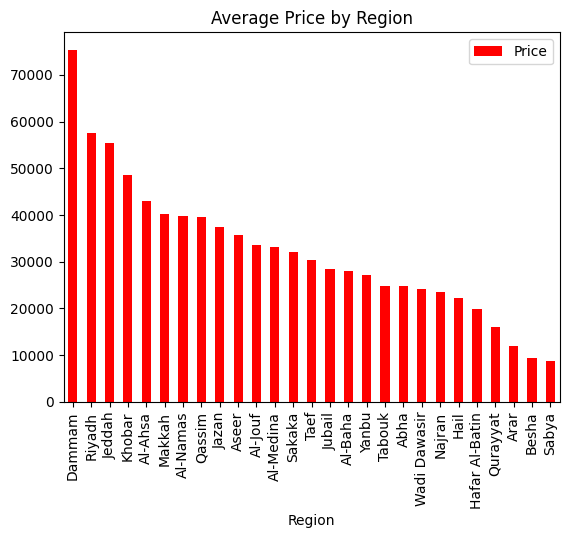

In [6]:
plt.figure(figsize=(20,10))

fig = pd.DataFrame(df.groupby(['Region'])['Price'].mean().sort_values(ascending = False))
fig.plot.bar(color='red')
plt.title('Average Price by Region')
plt.show()

**Insight:**

- Dari data di atas harga mobil bekas tertinggi berasal dari produsen mobil Bentley, Mercedes, Rolls-Royce, dan Land Rover. 
- Rata-rata harga mobil jika dilihat dari region terbanyak dari Dammam, Riyadh, Jeddah, dst.

**Top 10 Type of Used Cars & Top 10 Company of Used Cars**

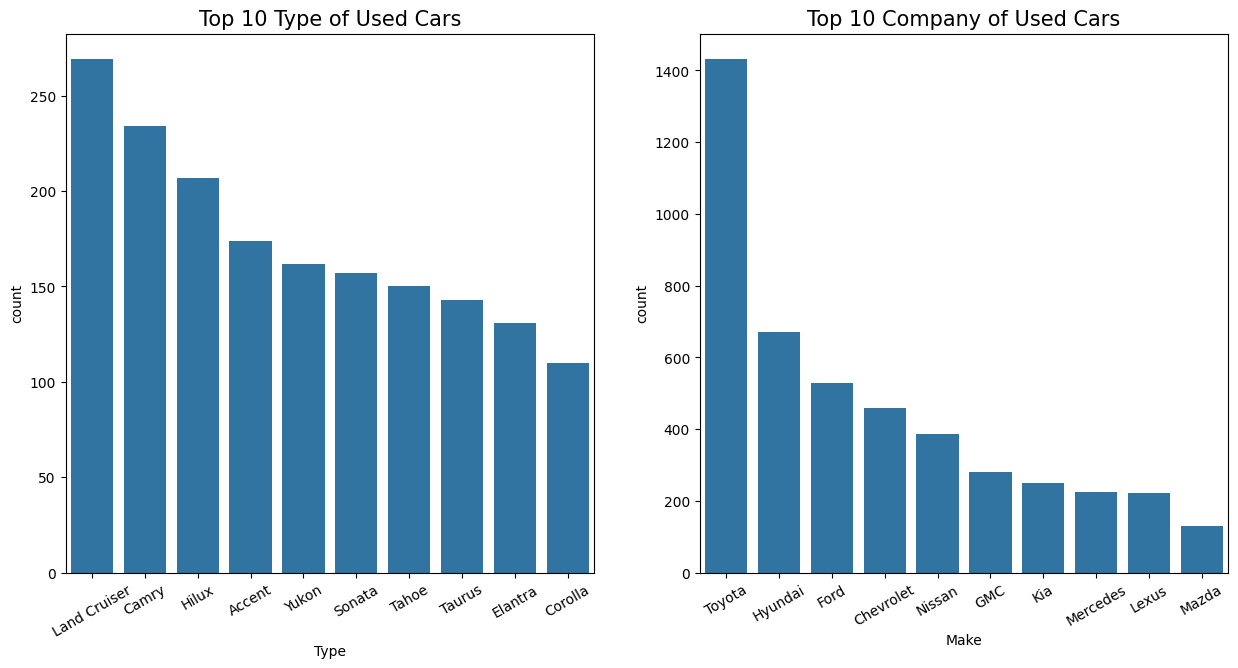

In [7]:
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
sns.countplot(x=df['Type'], order = df['Type'].value_counts().iloc[:10].index)
plt.title('Top 10 Type of Used Cars', size = 15)
plt.xticks(rotation = 30, size = 10)

plt.subplot(1,2,2)
sns.countplot(x=df['Make'], order = df['Make'].value_counts().iloc[:10].index)
plt.title('Top 10 Company of Used Cars', size = 15)
plt.xticks(rotation = 30, size = 10)

plt.show()

**Insight:**

Dari grafik di atas terlihat bahwa tipe mobil bekas yang tertinggi adalah berasal dari produsen mobil Toyota (Land Cruiser, Camry, Hilux, etc) yang mana juga merupakan produsen mobil bekas yang paling banyak dibandingkan dengan perusahaan lainnya. Kemudian, yang kedua tipe mobil bekas berasal dari produsen yang Hyundai (Accent, Sonata, dan Elantra) menempati urutan kedua tertinggi. Jadi, berdasarkan grafik ini, kita dapat melihat adanya korelasi antara **Categorical Variable**; Merek mobil dan Tipe mobil.

**Top 10 Region of Used Cars & Origin of Used Cars**

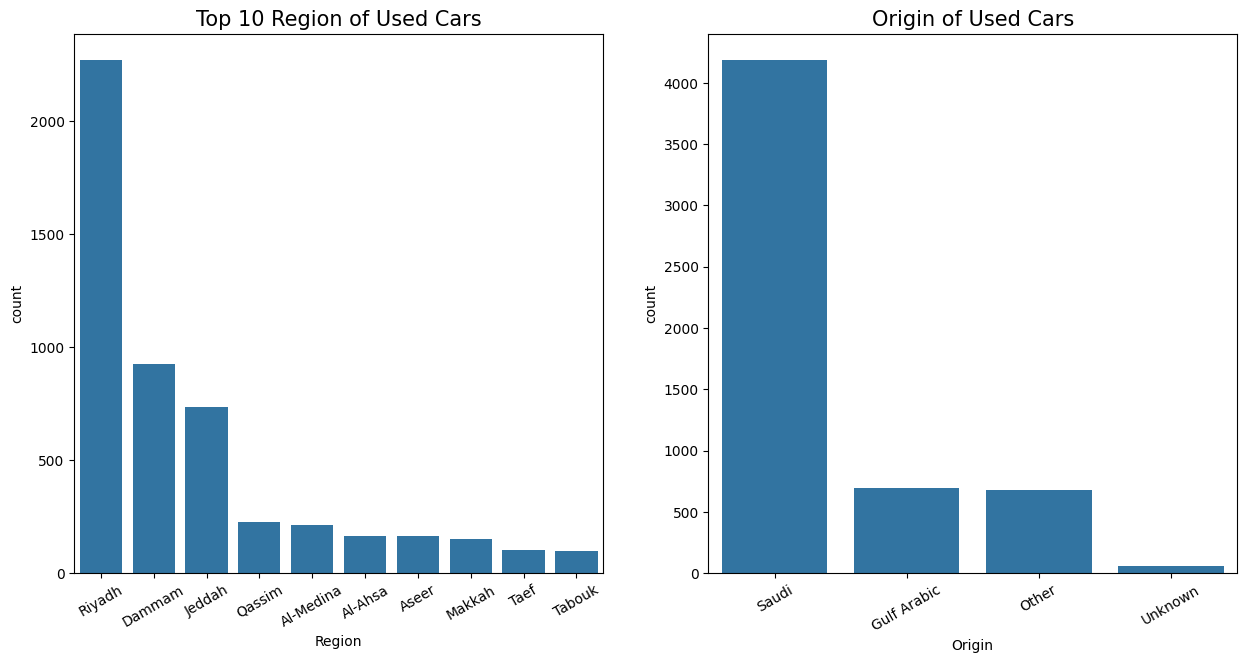

In [8]:
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
sns.countplot(x=df['Region'], order = df['Region'].value_counts().iloc[:10].index)
plt.title('Top 10 Region of Used Cars', size = 15)
plt.xticks(rotation = 30, size = 10)

plt.subplot(1,2,2)
sns.countplot(x=df['Origin'], order = df['Origin'].value_counts().index)
plt.title('Origin of Used Cars', size = 15)
plt.xticks(rotation = 30, size = 10)

plt.show()

**Insight:**

Seperti yang dapat kita lihat, Riyadh adalah wilayah dengan jumlah mobil bekas terbanyak, sementara Saudi adalah negara asal mobil bekas terbanyak. Terlihat bahwa grafik ini memiliki korelasi satu sama lain. Namun, mari kita lihat dari sisi lain. Terdapat variabel `Unknown` dan `Other` dalam grafik Asal mobil bekas. Hal ini membuat data kita menjadi kurang valid dan akan coba kita tangani di tahapan **Data Cleaning**

In [10]:
print(f"\nType & Amount of Negotiable on Used Cars :\n{df['Negotiable'].value_counts()}")
print(f"\nType & Amount of Gear Type on Used Cars :\n{df['Gear_Type'].value_counts()}")
print(f"\nType & Amount of Options on Used Cars :\n{df['Options'].value_counts()}")


Type & Amount of Negotiable on Used Cars :
Negotiable
False    3828
True     1796
Name: count, dtype: int64

Type & Amount of Gear Type on Used Cars :
Gear_Type
Automatic    4875
Manual        749
Name: count, dtype: int64

Type & Amount of Options on Used Cars :
Options
Full         2233
Standard     1822
Semi Full    1569
Name: count, dtype: int64


**Insight:**

- Kebanyakan untuk harga mobil yang ada sudah harga pasti dan tidak dapat dinegoisaikan.
- Mobil-mobil bekas yang ada didominasi oleh mobil bertransmisi Automatic
- Terdapat tiga jenis Opsi pada Mobil Bekas, yaitu Full (2233), Standar (1822), dan Semi Full (1569).

## 3. Data Preprocessing

Dataset yang digunakan membutuhkan tahapan *Cleaning* yang bertujuan untuk mendapatkan data yang sudah bersih yang akan dilakukan pada tahapan ini dengan tujuan untuk mendaptkan data yang valid guna pengambilan keputusan

### Membuat duplikasi Data

In [11]:
mobkas = df.copy()

In [12]:
listItem = []

for col in mobkas.columns:
    listItem.append([col, mobkas[col].dtype, mobkas[col].isna().sum(), round((mobkas[col].isna().sum()/len(mobkas[col]))*100, 2),
                    mobkas[col].nunique(), list(mobkas[col].drop_duplicates().sample(2).values)]);

mobkas_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
mobkas_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Type,object,0,0.0,347,"[Megane, Terrain]"
1,Region,object,0,0.0,27,"[Al-Medina, Najran]"
2,Make,object,0,0.0,58,"[Volkswagen, Toyota]"
3,Gear_Type,object,0,0.0,2,"[Manual, Automatic]"
4,Origin,object,0,0.0,4,"[Unknown, Other]"
5,Options,object,0,0.0,3,"[Semi Full, Full]"
6,Year,int64,0,0.0,50,"[1982, 2008]"
7,Engine_Size,float64,0,0.0,71,"[6.5, 6.0]"
8,Mileage,int64,0,0.0,1716,"[179858, 134946]"
9,Negotiable,bool,0,0.0,2,"[False, True]"


In [13]:
mobkas.describe()

,Year,Engine_Size,Mileage,Price
count,5624.0,5624.0,5624.0,5624.0
mean,2014.1,3.3,150923.4,53074.1
std,5.8,1.5,382836.0,70155.3
min,1963.0,1.0,100.0,0.0
25%,2012.0,2.0,38000.0,0.0
50%,2016.0,3.0,103000.0,36500.0
75%,2018.0,4.5,196000.0,72932.5
max,2022.0,9.0,20000000.0,850000.0


**Insight:**

- Dari tabel diatas menunjukkan bahwa dataset yang digunakan tidak memiliki missing value, namun apabila melihat 'unique' value pada feature `Origin` terdapat value Other dan Unknown seperti yang telah kita temukan pada analisa data di atas sebelumnya. Proses selanjutnya kita perlu mengobservasi terlebih dahulu untuk dapat menentukan langkah untuk mengatasinya


### Mengecek Missing Values dan Duplicated Data

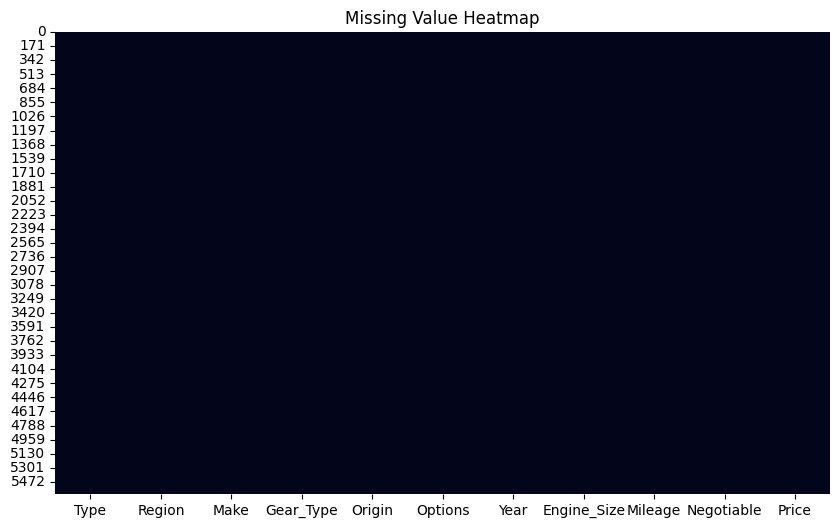

In [14]:
plt.figure(figsize=(10, 6))
sns.heatmap(mobkas.isnull(), cbar=False)
plt.title('Missing Value Heatmap')
plt.show()

In [15]:
print("Number of duplicate rows: ", mobkas.duplicated().sum())

Number of duplicate rows:  4


**Insight**

- Dari informasi dataset di atas, dapat terlihat bahwa tidak ada missing value dalam dataset.
- Terdapat 4 baris yang memiliki data duplikat, hal ini mungkin bisa disebabkan oleh kesalahan penginputan data atau metode pengumpulan data. Menghapus data duplikat akan membantu kita memiliki data yang lebih baik dalam melakukan observasi selanjutnya dibawah ini.

In [16]:
#DROP DATA DUPLIKAT

mobkas.drop_duplicates(inplace=True)
print("Number of duplicate rows: ", mobkas.duplicated().sum())

Number of duplicate rows:  0


#### Merubah data berisi informasi 'Unknown' menjadi 'Other' pada kolom 'Origin'

Dari data hasil analisa kita di atas tadi, ditemukan kolom berisikian data 'Unknown' pada kolom Origin, maka dari itu kita harus handling data tersebut.

In [17]:
# Cek jumlah unique values 
mobkas['Origin'].value_counts()

Origin
Saudi          4184
Gulf Arabic     697
Other           678
Unknown          61
Name: count, dtype: int64

In [18]:
mobkas['Origin'] = mobkas['Origin'].replace(['Unknown'],'Other')



In [19]:
# Cek kembali jumlah unique values setelah dirubah
mobkas['Origin'].value_counts()

Origin
Saudi          4184
Other           739
Gulf Arabic     697
Name: count, dtype: int64

Setelah kita handling data nya, saat ini jumlah unique values hanya menjadi 3 kategori: Saudi, Gulf Arabic, dan Other

#### Merubah data berisi informasi 'Other' pada kolom 'Make' & 'Type'

In [20]:
mobkas[mobkas['Make']=='Other']

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
451,Other,Taef,Other,Automatic,Saudi,Full,2004,2.4,6000,True,0
663,Other,Qassim,Other,Manual,Other,Standard,1980,2.4,2500,False,220000
881,Other,Al-Baha,Other,Manual,Other,Standard,2020,1.1,2848,False,2000
969,Other,Riyadh,Other,Manual,Saudi,Standard,2006,6.5,81250,True,0
1199,Other,Qassim,Other,Manual,Other,Full,2019,8.0,24643,False,330000
1253,Other,Al-Medina,Other,Manual,Other,Standard,2009,2.4,1300,False,26000
1629,Other,Jeddah,Other,Manual,Other,Semi Full,2021,1.2,3000,False,5500
1752,Other,Khobar,Other,Manual,Other,Semi Full,2019,2.4,1000,True,0
2595,Other,Jazan,Other,Manual,Other,Standard,2011,2.4,100000,True,0
3789,Other,Riyadh,Other,Automatic,Saudi,Full,2009,2.4,218000,True,0


In [21]:
mobkas[mobkas['Type']=='Other']

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
115,Other,Jubail,Suzuki,Automatic,Saudi,Standard,2017,1.6,100,True,0
451,Other,Taef,Other,Automatic,Saudi,Full,2004,2.4,6000,True,0
663,Other,Qassim,Other,Manual,Other,Standard,1980,2.4,2500,False,220000
881,Other,Al-Baha,Other,Manual,Other,Standard,2020,1.1,2848,False,2000
969,Other,Riyadh,Other,Manual,Saudi,Standard,2006,6.5,81250,True,0
1186,Other,Dammam,Hyundai,Automatic,Other,Full,2011,4.6,270,False,30000
1199,Other,Qassim,Other,Manual,Other,Full,2019,8.0,24643,False,330000
1253,Other,Al-Medina,Other,Manual,Other,Standard,2009,2.4,1300,False,26000
1485,Other,Al-Ahsa,Suzuki,Manual,Other,Full,2014,1.0,25000,True,0
1629,Other,Jeddah,Other,Manual,Other,Semi Full,2021,1.2,3000,False,5500


Terdapat data 'Other' value pada kolom *Make* dan kolom *Type* dan kolom Origin column. Kita akan coba melihat hubungannya dengan kolom *Price*

In [22]:
mobkas2 = mobkas[(mobkas['Make']=='Other')&(mobkas['Type']=='Other')]
mobkas2.Price.describe()

count       10.0
mean     58350.0
std     117361.3
min          0.0
25%          0.0
50%       1000.0
75%      20875.0
max     330000.0
Name: Price, dtype: float64

 Data ('Other') memiliki average price value of 58350 dengan standard deviation of 117361 yang cukup tinggi. Kita akan mendelete kolom yang memiliki nilai other pada kolom 'Make' & 'Type' karena hasil aanlisa menunjukkan mobil yang terjual tanpa spesifikasi yang jelas ('Other') tidak memiliki spesifik *Price* value pada kolom 'Price'

In [23]:
mobkas = mobkas[(mobkas['Make']!='Other')|(mobkas['Type']!='Other')]

In [24]:
mobkas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5610 entries, 0 to 5623
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         5610 non-null   object 
 1   Region       5610 non-null   object 
 2   Make         5610 non-null   object 
 3   Gear_Type    5610 non-null   object 
 4   Origin       5610 non-null   object 
 5   Options      5610 non-null   object 
 6   Year         5610 non-null   int64  
 7   Engine_Size  5610 non-null   float64
 8   Mileage      5610 non-null   int64  
 9   Negotiable   5610 non-null   bool   
 10  Price        5610 non-null   int64  
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 487.6+ KB


#### Delete kolom yang tidak diperlukan

Selanjutnya kita akan menghapus kolom yang tidak perlu karena tidak terlalu berpengaruh pada dataset. Kolom Negotiable tidak terlalu berpengaruh terhadap variabel lain (Type - Negotiable, Region - Negotiable, Year - Negotiable). Jadi kolom Negotiable kita drop agar tidak memberatkan model yang akan dibuat.

In [25]:
mobkas = mobkas.drop(['Negotiable'], axis=1)
mobkas.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,0


Seperti yang sebelumnya sudah disbutkan masih ada nilai pada kolom Price yang memiliki angka 0, dan ini tidak mungkin mobil dijual dengan angka 0. Selanjutnya kita akan melakukan drop baris yang berisikan angka 0 untuk anomali data ini.

In [26]:
# Cek jumlah baris dengan angka'0'
print("Number of Price with 0 value : ",mobkas[mobkas['Price'] == 0]['Price'].count())

Number of Price with 0 value :  1791


Karena data pada kolom Price dengan nilai 0 berjulumlah 1791 data (31,93% of the data), kita putuskan untuk mendrop baris pada kolom Price dengan nilai 0, karena jika tidak akan berefek pada model yang akan dibuat nanti.

In [27]:
# Hapus baris pada kolom Price dengan nilai 0
mobkas = mobkas[mobkas['Price'] != 0]
mobkas.sort_values(by='Price', ascending=1, inplace=True)
mobkas.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
3131,Yukon,Jubail,GMC,Automatic,Saudi,Full,2019,5.3,50000,1
3992,G80,Riyadh,Genesis,Automatic,Other,Semi Full,2018,3.8,170000,500
4399,Yaris,Riyadh,Toyota,Automatic,Saudi,Standard,2018,1.5,100000,850
5128,Rio,Arar,Kia,Automatic,Saudi,Standard,2019,1.4,55500,884
3474,Yaris,Najran,Toyota,Automatic,Saudi,Standard,2019,1.6,85000,950


Saat ini sudah tidak ada lagi kolom price yang memiliki nilai 0 setelah kita melakukan drop data.

Dalam melakukan jual beli mobil bekas, jarak tempuh (Mileage) merupakan salah satu faktor utama yang mempengaruhi harga (Price).Oleh karena itu  kita akan melihat outliers data dari numerical variabel.

### Mengecek Data Outliers

Kita akan melihat dimasing-masing struktur data nya apa mempunyai data Outlier / atau data yang menyimpang dari sebaran data tersebut, dikarenakan sebelum melakukan analisa kita juga harus mengecek data tersebut menyebar normal atau tidak.

Banyaknya outliers pada data tentu akan memengaruhi hasil analisis dan pemodelan yang dilakukan. Ada beberapa hal yang harus dipertimbangkan sebelum memutuskan treatment yang sesuai dengan data, di antaranya adalah dengan mempertimbangkan sisi domain knowledge.


In [28]:
mobkas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3819 entries, 3131 to 3513
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         3819 non-null   object 
 1   Region       3819 non-null   object 
 2   Make         3819 non-null   object 
 3   Gear_Type    3819 non-null   object 
 4   Origin       3819 non-null   object 
 5   Options      3819 non-null   object 
 6   Year         3819 non-null   int64  
 7   Engine_Size  3819 non-null   float64
 8   Mileage      3819 non-null   int64  
 9   Price        3819 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 328.2+ KB


Kita akan melihat distribution plot untuk numerical variabel dari dataset sebelum memutuskan untuk drop kolom atau baris yang mungking memiliki outliers.

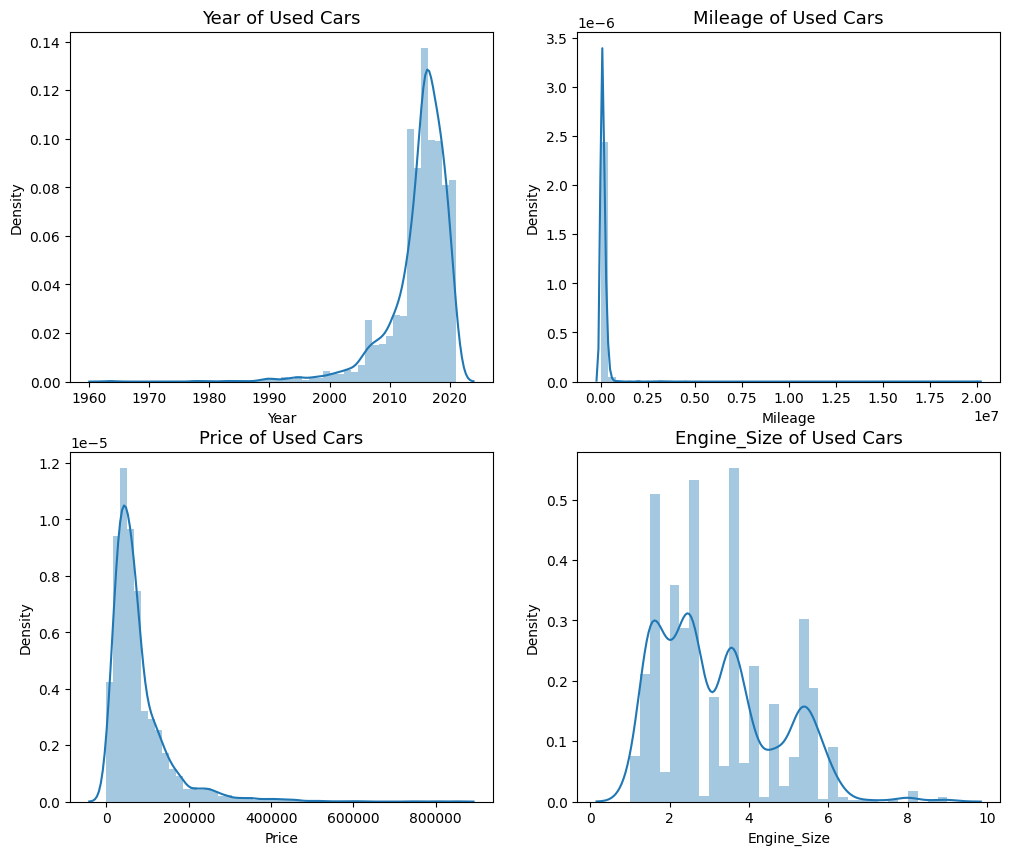

In [29]:
plt.figure(figsize=(12,10))

plt.subplot(221)
sns.distplot(mobkas['Year'])
plt.title('Year of Used Cars',fontsize=13)

plt.subplot(222)
sns.distplot(mobkas['Mileage'])
plt.title('Mileage of Used Cars',fontsize=13)

plt.subplot(223)
sns.distplot(mobkas['Price'])
plt.title('Price of Used Cars',fontsize=13)

plt.subplot(224)
sns.distplot(mobkas['Engine_Size'])
plt.title('Engine_Size of Used Cars',fontsize=13)

plt.show()

<Figure size 800x600 with 0 Axes>

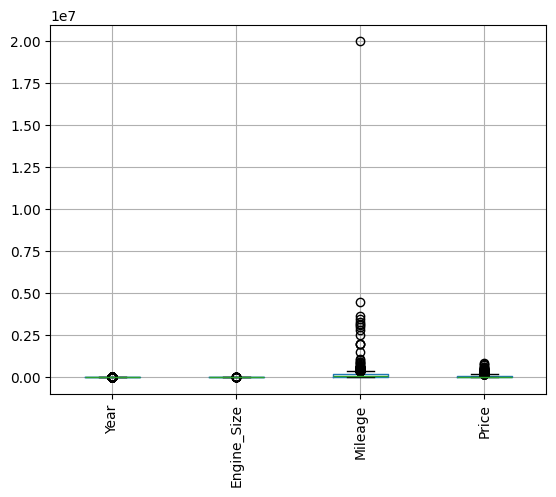

<Figure size 800x600 with 0 Axes>

In [30]:
# Cek data outliers menggunakan box plot
mobkas.boxplot(rot=90)
plt.figure(figsize = (8,6))

Dari hasil di atas, terlihat adanya outliers  pada kolom `Mileage` dan `Price`, dimana untuk kolom `Price` terlihat tidak terdistribusi normal dan terlihat skew to the right, mengindikasikan banyaknya nilai low *Price* values. Outlier ini harus kita tangani agar tidak menganggu analisis data dan model yang akan kita buat.

Kita akan  mendeskripsikan numerical variabel ke dalam bentuk persentase untuk memilih cara untuk menangani data outliers.

In [31]:
mobkas.describe(percentiles = [0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,1])

,Year,Engine_Size,Mileage,Price
count,3819.0,3819.0,3819.0,3819.0
mean,2014.9,3.2,142798.9,77968.6
std,5.1,1.5,378609.8,72620.4
min,1963.0,1.0,100.0,1.0
5%,2006.0,1.4,275.6,14000.0
10%,2009.0,1.5,5000.0,21400.0
20%,2013.0,1.8,33502.8,30000.0
30%,2014.0,2.2,61000.0,40000.0
40%,2015.0,2.5,83000.0,49000.0
50%,2016.0,2.7,103000.0,58000.0


**- Year**

<Axes: xlabel='Year'>

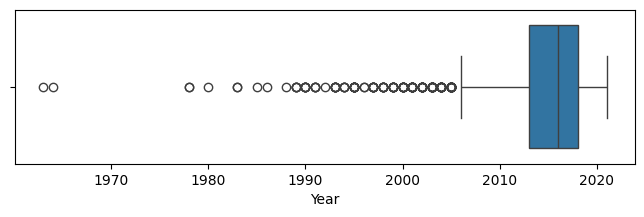

In [32]:
# Cek data dengan box plot
plt.figure(figsize=(8,2))
sns.boxplot(x=mobkas["Year"])

In [33]:
print("Count of data Year less than 10% percentile :",((mobkas[mobkas['Year'] < 2009].count()['Year'])/3819)*100,"%")

Count of data Year less than 10% percentile : 9.478921183555904 %


In [34]:
# Sort minimal 10 tahun awal
mobkas.sort_values(by='Year', ascending=1, inplace=True)
mobkas.head(10)

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
5012,Other,Riyadh,Ford,Manual,Saudi,Standard,1963,1.0,300,22000
2262,Impala,Al-Ahsa,Chevrolet,Automatic,Other,Full,1964,1.2,100000,75000
3238,Patrol,Abha,Nissan,Manual,Saudi,Standard,1978,4.0,30000,28000
3082,Land Cruiser 70,Riyadh,Toyota,Manual,Saudi,Standard,1978,4.0,400000,18000
4259,S,Riyadh,Mercedes,Automatic,Other,Standard,1980,3.0,160000,40000
306,Land Cruiser Pickup,Aseer,Toyota,Manual,Saudi,Standard,1983,1.5,2580,15000
3129,Land Cruiser 70,Dammam,Toyota,Manual,Saudi,Standard,1983,3.8,300000,14000
3240,Silverado,Dammam,Chevrolet,Automatic,Other,Full,1985,5.3,200,30000
62,SEL,Tabouk,Mercedes,Automatic,Saudi,Full,1986,3.0,500000,5500
1419,Land Cruiser,Najran,Toyota,Manual,Saudi,Semi Full,1988,4.0,195000,30000


**Insight**
- Dapat kita lihat dari boxplot bahwa data outliers cenderung ada dikiri (maka dari itu kita coba melihat minimal tahun) 
- Minimal valuation masih berada disekitar 10% dari total dataset = (9,47%)
- Tidak terlihat gap yang cukup jauh antara 10 tahun minimal daengan data lainnya, masih terlihat banyak variasi data dibawah  nilai rata-rata (2014-2015).

Jadi kita putuskan untuk tetap mempertahankan data yang ada untuk numerical variabel Year.


**- Engine_Size**

<Axes: xlabel='Engine_Size'>

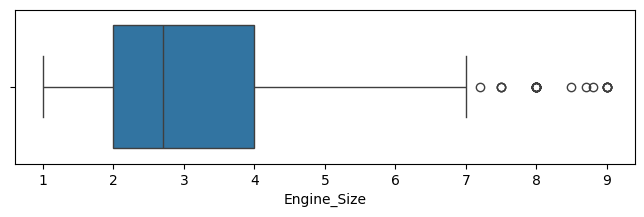

In [35]:
# Cek data dengan box plot
plt.figure(figsize=(8,2))
sns.boxplot(x=mobkas["Engine_Size"])

In [36]:
# Sort maksimal 10 tahun awal
mobkas.sort_values(by='Engine_Size', ascending=0, inplace=True)
mobkas.head(10)

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
59,Camry,Taef,Toyota,Automatic,Saudi,Semi Full,2001,9.0,150000,15000
650,E,Jeddah,Mercedes,Manual,Other,Semi Full,2017,9.0,134000,155000
5251,Sierra,Dammam,GMC,Automatic,Saudi,Full,2021,9.0,100,178000
3525,FJ,Hail,Toyota,Automatic,Saudi,Full,2014,9.0,308000,75000
2217,Camry,Jeddah,Toyota,Automatic,Saudi,Semi Full,2014,9.0,106000,36000
1547,Marquis,Riyadh,Ford,Automatic,Other,Full,2008,9.0,115,17000
600,G,Riyadh,Mercedes,Automatic,Saudi,Full,2015,8.8,213000,240000
3848,Range Rover,Jeddah,Land Rover,Automatic,Saudi,Semi Full,2013,8.7,177,88000
1227,Dyna,Riyadh,Isuzu,Manual,Saudi,Standard,2003,8.5,330,40000
4439,Tahoe,Aseer,Chevrolet,Automatic,Saudi,Semi Full,2019,8.0,132346,140000


In [37]:
print("Count of data Engine_Size more than 90% percentile :",((mobkas[mobkas['Engine_Size'] > 5.3].count()['Engine_Size'])/3819)*100,"%")

Count of data Engine_Size more than 90% percentile : 9.583660644147683 %


**Insight**
- Dapat kita lihat dari boxplot bahwa data outliers cenderung ada di kanan (maka dari itu kita coba melihat data maksimal) 
- Minimal valuation masih berada disekitar 10% dari total dataset = (9,58%)

Jadi kita putuskan untuk tetap mempertahankan data yang ada untuk numerical variabel Engine Size

**- Mileage**

<Axes: xlabel='Mileage'>

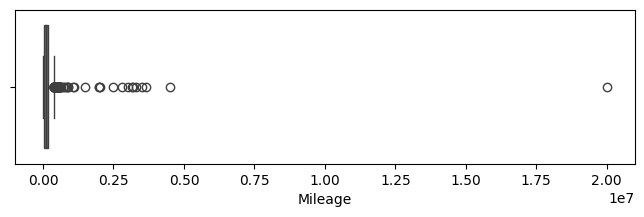

In [38]:
# Cek data dengan box plot
plt.figure(figsize=(8,2))
sns.boxplot(x=mobkas["Mileage"])

In [39]:

mobkas.sort_values(by='Mileage', ascending=0, inplace=True)
mobkas.head(10)

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
3403,Optra,Riyadh,Chevrolet,Manual,Other,Semi Full,2009,1.6,20000000,9000
572,Camry,Yanbu,Toyota,Automatic,Other,Full,1998,2.5,4500000,15000
4193,Innova,Riyadh,Toyota,Manual,Saudi,Standard,2013,2.7,3640000,30000
1412,Trailblazer,Jeddah,Chevrolet,Automatic,Other,Full,2004,5.3,3500000,10000
4548,Tahoe,Riyadh,Chevrolet,Automatic,Saudi,Semi Full,2008,5.7,3300000,27000
915,Pathfinder,Riyadh,Nissan,Automatic,Saudi,Standard,1998,3.5,3180003,10500
4875,Pathfinder,Riyadh,Nissan,Automatic,Saudi,Full,2008,2.6,3150000,20000
3387,Fusion,Hail,Ford,Automatic,Saudi,Full,2010,2.5,3000000,17000
1334,Prado,Makkah,Toyota,Manual,Saudi,Semi Full,2006,4.0,2800000,35000
3797,Marquis,Riyadh,Ford,Automatic,Saudi,Semi Full,2005,4.6,2500000,9000


In [40]:
print("Count of data Mileage more than 90% percentile :",((mobkas[mobkas['Mileage'] > 284200.0].count()['Mileage'])/3819)*100,"%")

Count of data Mileage more than 90% percentile : 10.002618486514795 %


**Insight**

- Dapat kita lihat dari boxplot bahwa data outliers cenderung ada di kanan (maka dari itu kita coba melihat data maksimal) 
- Minimal valuation masih berada disekitar 10% dari total dataset = (10,00%)
- Terdapat data outliers yang memiliki nilai sangat menyimpang (extreme value) pada 20000000 dengan nilai Price 9000. Kita asumsikan ini data outliers karena memiliki gap cukup jauh antara rentang 4500000 ke 20000000. **(Drop Data)**

Jadi kita putuskan drop data Mileage


**- Price**

<Axes: xlabel='Price'>

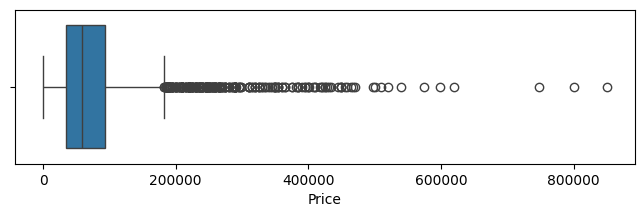

In [41]:
# Cek data dengan box plot
plt.figure(figsize=(8,2))
sns.boxplot(x=mobkas["Price"])

In [42]:

mobkas.sort_values(by='Price', ascending=0, inplace=True)
mobkas.head(10)

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
3513,Bentayga,Dammam,Bentley,Automatic,Saudi,Full,2019,6.0,13000,850000
4684,G,Riyadh,Mercedes,Automatic,Other,Full,2019,4.0,39000,800000
4273,S,Dammam,Mercedes,Automatic,Gulf Arabic,Full,2021,3.0,2500,748000
2120,Ghost,Dammam,Rolls-Royce,Automatic,Saudi,Full,2016,6.0,40000,620000
4653,Range Rover,Riyadh,Land Rover,Automatic,Other,Full,2019,5.0,4200,599000
3561,Range Rover,Riyadh,Land Rover,Automatic,Saudi,Full,2020,5.0,26000,575000
3105,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2020,5.0,36000,540000
2862,Range Rover,Riyadh,Land Rover,Automatic,Saudi,Full,2019,5.6,36000,520000
2504,Range Rover,Riyadh,Land Rover,Automatic,Saudi,Full,2020,3.0,11500,510000
3041,Camargue,Dammam,Rolls-Royce,Automatic,Saudi,Full,1990,6.7,5000,500000


In [43]:
print("Count of data Mileage more than 90% percentile :",((mobkas[mobkas['Price'] > 153000.0].count()['Price'])/3819)*100,"%")

Count of data Mileage more than 90% percentile : 9.97643362136685 %


**Insight**

- Dapat kita lihat dari boxplot bahwa data outliers cenderung ada di kanan (maka dari itu kita coba melihat data maksimal) 
- Minimal valuation masih berada disekitar 10% dari total dataset = (9,97%)
- Terdapat data outliers yang memiliki nilai sangat menyimpang (extreme value) pada Price 1 to 500. Dimana tidak mungkin menjual mobil dengan harga 1 Riyal. Kita asumsikan ini data outliers **(Drop Data)**

Jadi kita akan drop data Price.


Setelah kita melihat dan analisa data-data outliers pada setiap numerical variables, kita memutuskan untuk menentukkan range yang akan digunakan untuk menjadikan data yang digunakan lebih presisi dengan mendrop beberapa data pada kolom Mileage dan Price dengan kriteria yang diasumsikan sebagai berikut:

**[Source ](https://ksa.hatla2ee.com/en/car/used-prices)**


| **Variable** | **Range** |
| --- | --- |
| Price | > = 4000 |
| Mileage | < = 600000

### Drop the Outliers

Keputusan yang digunakan untuk analisa data selanjutnya setelah melihat data outliers :
- Drop data pada kolom Mileage more than and equal to 600000
- Drop data pada kolom Price less than and equal to 4000

In [44]:
# Drop data Outliers
mobkas = mobkas[(mobkas['Price'] >= 4000)]
mobkas = mobkas[(mobkas['Mileage'] <= 600000)]
mobkas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3734 entries, 3513 to 5521
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         3734 non-null   object 
 1   Region       3734 non-null   object 
 2   Make         3734 non-null   object 
 3   Gear_Type    3734 non-null   object 
 4   Origin       3734 non-null   object 
 5   Options      3734 non-null   object 
 6   Year         3734 non-null   int64  
 7   Engine_Size  3734 non-null   float64
 8   Mileage      3734 non-null   int64  
 9   Price        3734 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 320.9+ KB


In [45]:
mobkas.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
3513,Bentayga,Dammam,Bentley,Automatic,Saudi,Full,2019,6.0,13000,850000
4684,G,Riyadh,Mercedes,Automatic,Other,Full,2019,4.0,39000,800000
4273,S,Dammam,Mercedes,Automatic,Gulf Arabic,Full,2021,3.0,2500,748000
2120,Ghost,Dammam,Rolls-Royce,Automatic,Saudi,Full,2016,6.0,40000,620000
4653,Range Rover,Riyadh,Land Rover,Automatic,Other,Full,2019,5.0,4200,599000


Data yang ada saat ini setelah kita lakukan drop data outliers adalah 3734 atau 66,55% dari data sebelumnya

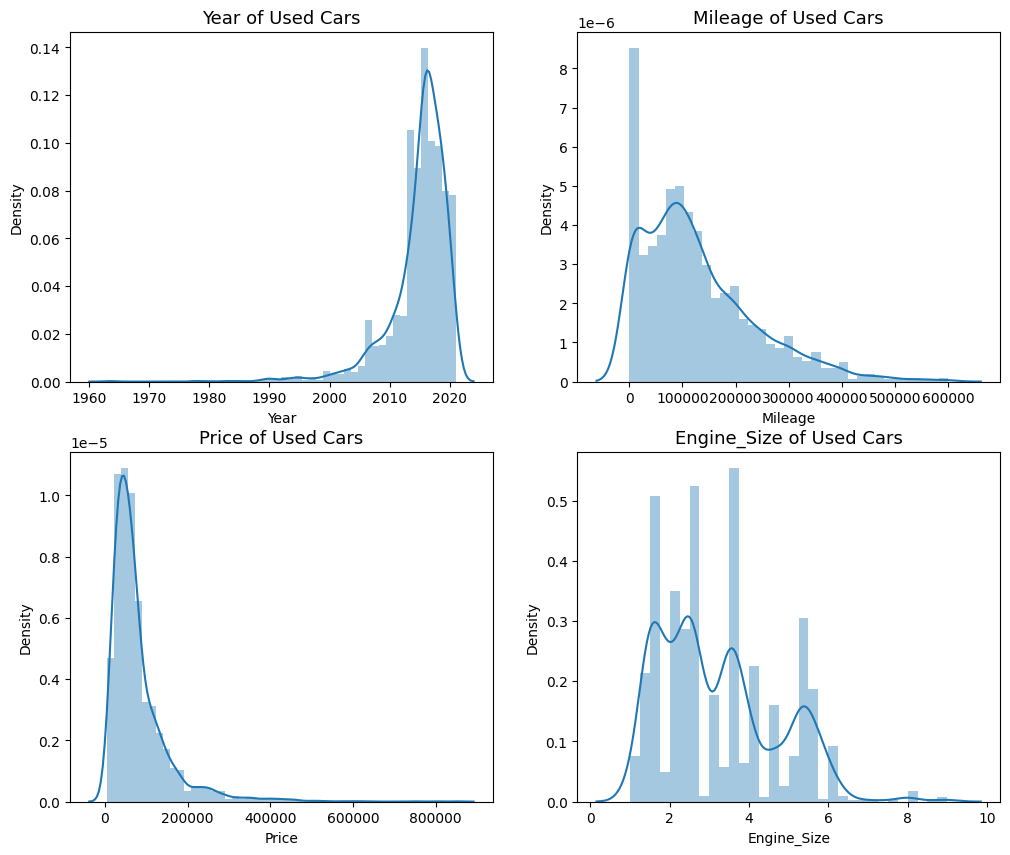

In [46]:
plt.figure(figsize=(12,10))

plt.subplot(221)
sns.distplot(mobkas['Year'])
plt.title('Year of Used Cars',fontsize=13)

plt.subplot(222)
sns.distplot(mobkas['Mileage'])
plt.title('Mileage of Used Cars',fontsize=13)

plt.subplot(223)
sns.distplot(mobkas['Price'])
plt.title('Price of Used Cars',fontsize=13)

plt.subplot(224)
sns.distplot(mobkas['Engine_Size'])
plt.title('Engine_Size of Used Cars',fontsize=13)

plt.show()

Setelah kita melakukan analisa data outliers, sekarang terlihat distribution plot pada grafik-grafik di atas memiliki variasi skewness. Terdapat perubahan grafik pada kolom kategori `Mileage` dimana sudah tidak ekstrim lagi sebaran datanya. 

Kita saat ini memiliki variasi data yang beragam setelah kita melakukan data cleaning.

### Show the distribution data of Categorical Variabel

In [47]:
categorical_columns = mobkas.select_dtypes(include=['object'])
categorical_columns.head()

,Type,Region,Make,Gear_Type,Origin,Options
3513,Bentayga,Dammam,Bentley,Automatic,Saudi,Full
4684,G,Riyadh,Mercedes,Automatic,Other,Full
4273,S,Dammam,Mercedes,Automatic,Gulf Arabic,Full
2120,Ghost,Dammam,Rolls-Royce,Automatic,Saudi,Full
4653,Range Rover,Riyadh,Land Rover,Automatic,Other,Full


<Axes: xlabel='Gear_Type', ylabel='Price'>

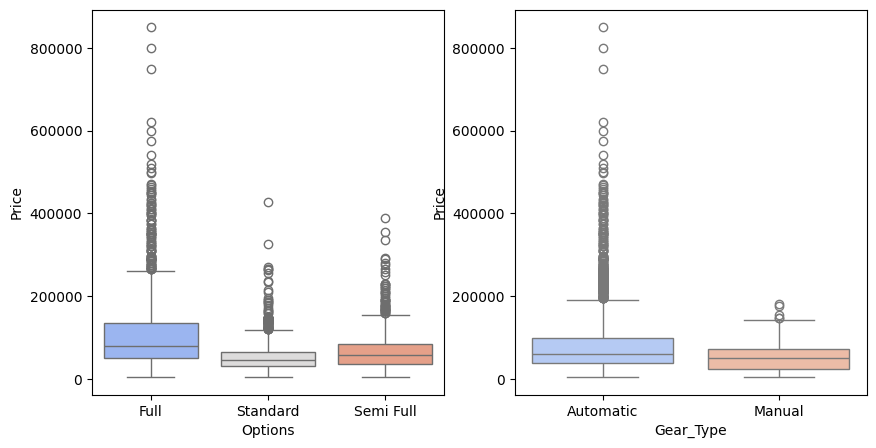

In [48]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(x=mobkas.Options, y=mobkas.Price, palette=("coolwarm"))

plt.subplot(1,2,2)
sns.boxplot(x=mobkas.Gear_Type, y=mobkas.Price, palette=("coolwarm"))

<Figure size 1000x700 with 0 Axes>

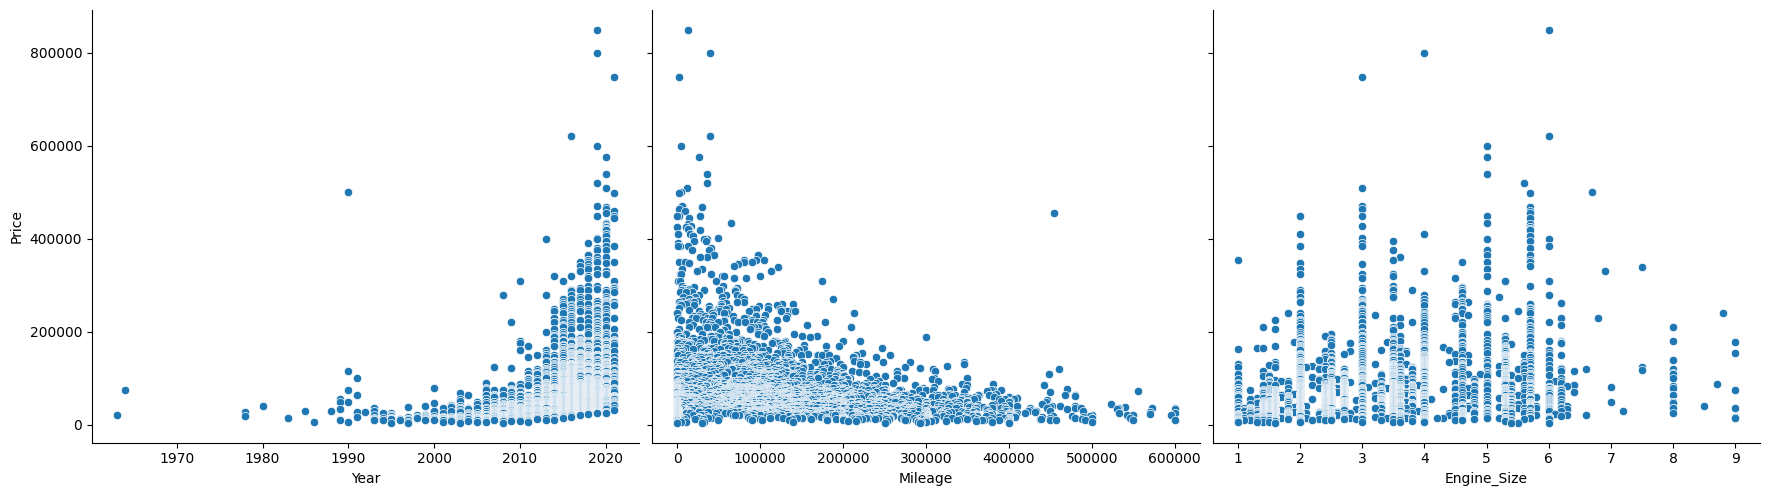

In [49]:
plt.figure(figsize=(10, 7))
sns.pairplot(mobkas, x_vars=['Year', 'Mileage', 'Engine_Size'], y_vars='Price',size=5, aspect=1.2, kind='scatter')
plt.show()

**Insights:**

- Automatic Gear punya sebaran data yang lebih tinggi terhadap Price dibandingkan dengan Manual Gear
- Full Options punya sebaran data yang lebih tinggi terhadap Price dibandingkan dengan
- Year memiliki korelasi positif dengan Price
- Mileage memiliki korelasi negatif negative dengan Price
- Engine Size memiliki korelasi yang tidak cukup kuat dengan Price


**Data Correlation**

In [50]:
mobkas_numeric = mobkas.apply(pd.to_numeric, errors='coerce')
mobkas_numeric = mobkas_numeric.dropna(axis=1)
corr = mobkas_numeric.corr(method='pearson')

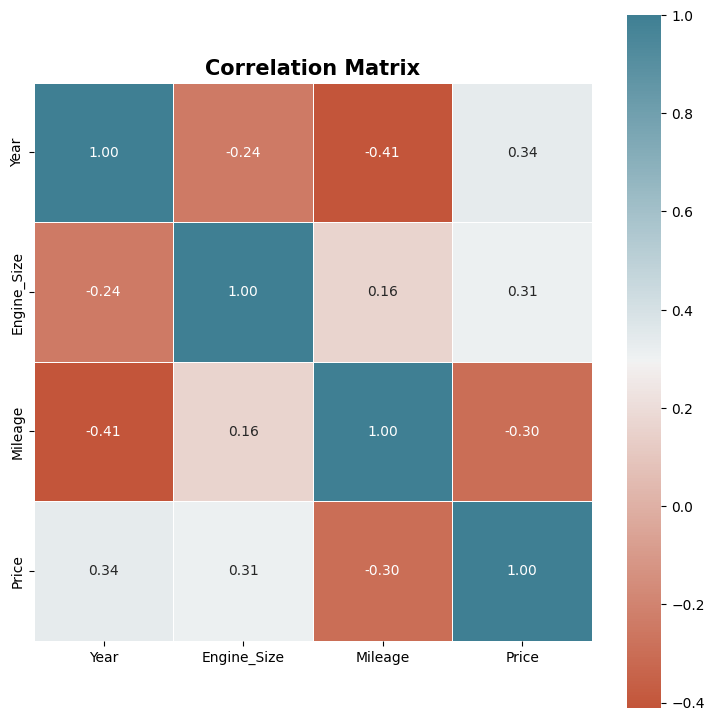

In [51]:
plt.figure(figsize=(9, 9))
palette = sns.diverging_palette(20, 220, n=256)
sns.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold')
plt.show()

Bisa kita lihat pada Correlation Matrix Heatmap di atas, terdapat high correlation antara Year dan Mileage dimana Mileage akan meningkat dari tahun ke tahun sesuai pemaikain kendaraan. Kita juga bisa lihat Price bergantung pada Year dan Engine Size.

## 4. Feature Engineering




Pada tahapan ini akan dilakukan proses:
1. Scalling,  transformasi terhadap data numerik agar antar variabel memiliki skala yang sama
2. Encoding, agar variable kategorik pada dapat direpresentasikan dalam machine learning

In [54]:
# Import library untuk modeling
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

**Encoding**

Berdasarkan data yang tersedia, terdapat 6 variabel kategorikal. Jika kita ingin menggunakan seluruh fitur tersebut, kita perlu melakukan encoding. Pemilihan metode encoding dapat didasarkan pada skala pengukuran data, apakah nominal (numerik) atau ordinal (memiliki urutan tertentu saat diurutkan). Pada tahap ini, kita akan melakukan encoding sebagai berikut:

1. One-Hot Encoding: untuk variabel Gear_Type, Origin, dan Options.
2. Binary Encoding: untuk variabel Type, Region, dan Make.

Kita dapat menggunakan ColumnTransformer untuk mengubah tipe data variabel-variabel tersebut, sehingga nantinya dapat diaplikasikan dalam pipeline model.

In [55]:
# Mengubah fitur kategorikal menjadi numerikal
transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(drop='first'), ['Gear_Type', 'Origin', 'Options']),
    ('Binary', ce.BinaryEncoder(), ['Type', 'Region', 'Make'])
], remainder='passthrough')

In [56]:
# Pisahkan data independen variabel dengan target
X = mobkas.drop(['Price'], axis=1)
y = mobkas['Price']

In [57]:
# Splitting training and test dengan proporsi 70:30
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,  
    test_size=0.3,
    random_state=42)

## 5. Modelling

In [58]:
# Models Algoritma
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=1)
rr = KernelRidge(kernel='polynomial')
ls = Lasso(alpha =0.0005, random_state=1)
en = ElasticNet(random_state=1, alpha =0.0005)
rf = RandomForestRegressor(random_state=1)
ada = AdaBoostRegressor(random_state=1)
gb = GradientBoostingRegressor(random_state=1)
xgb = XGBRegressor(random_state=1)

log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rr = TransformedTargetRegressor(rr, func=np.log, inverse_func=np.exp)
log_ls = TransformedTargetRegressor(ls, func=np.log, inverse_func=np.exp)
log_en = TransformedTargetRegressor(en, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_ada = TransformedTargetRegressor(ada, func=np.log, inverse_func=np.exp)
log_gb = TransformedTargetRegressor(gb, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# Data Scaling
scaler = StandardScaler()

# kist models
models = [log_lr, log_knn, log_dt, log_rr, log_ls, log_en, log_rf, log_ada, log_gb, log_xgb]


score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

score_msle = []
nilai_mean_msle = []
nilai_std_msle = []

score_r2 = []
nilai_mean_r2 = []
nilai_std_r2 = []

# Mencari best algoritma
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error',
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )
    
    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())
    
    # MSLE
    model_cv_msle = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_squared_log_error', 
        error_score='raise'
        )
    
    print(model_cv_msle, i)

    score_msle.append(model_cv_msle)
    nilai_mean_msle.append(model_cv_msle.mean())
    nilai_std_msle.append(model_cv_msle.std())
    
    # R-Squared
    model_cv_r2 = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='r2', 
        error_score='raise'
        )
    
    print(model_cv_r2, i)

    score_r2.append(model_cv_r2)
    nilai_mean_r2.append(model_cv_r2.mean())
    nilai_std_r2.append(model_cv_r2.std())

    

[-50234.90837377 -41398.75567522 -45880.58931022 -60035.79691986
 -47018.63301735] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-24835.42107454 -23438.12311483 -24382.10376668 -29607.09422611
 -27062.95078707] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-0.34312042 -0.34754315 -0.38132783 -0.38948195 -0.37087831] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-0.18926289 -0.19594126 -0.23076892 -0.22623671 -0.1915162 ] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[0.51548326 0.56724532 0.57516551 0.39121506 0.59301893] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegress

In [59]:
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor',  'Rigde Regression', 'Lasso Regression', 'Elastic Net', 'RandomForest Regressor', 'AdaBoost Regressor', 'Gradient Boosting Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape,
    'Mean_MSLE': nilai_mean_msle,
    'Std_MSLE': nilai_std_msle,
    'Mean_R2': nilai_mean_r2,
    'Std_R2': nilai_std_r2
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE,Mean_MSLE,Std_MSLE,Mean_R2,Std_R2
0,Linear Regression,-48913.7,6240.4,-25865.1,2217.5,-0.4,0.0,-0.2,0.0,0.5,0.1
1,KNN Regressor,-45798.3,4442.5,-25198.2,1179.5,-0.4,0.0,-0.2,0.0,0.6,0.0
2,DecisionTree Regressor,-50591.9,5050.9,-23964.3,1860.6,-0.4,0.0,-0.2,0.0,0.5,0.1
3,Rigde Regression,-31318.9,4214.7,-15556.5,1296.2,-0.2,0.0,-0.1,0.0,0.8,0.0
4,Lasso Regression,-48946.3,6249.9,-25850.1,2214.5,-0.4,0.0,-0.2,0.0,0.5,0.1
5,Elastic Net,-48932.9,6245.2,-25858.4,2216.0,-0.4,0.0,-0.2,0.0,0.5,0.1
6,RandomForest Regressor,-35442.0,4753.1,-16757.8,1099.3,-0.2,0.0,-0.1,0.0,0.8,0.0
7,AdaBoost Regressor,-48486.7,4996.4,-27379.1,1583.7,-0.4,0.0,-0.2,0.0,0.5,0.1
8,Gradient Boosting Regressor,-37899.0,4271.6,-19032.9,1121.9,-0.3,0.0,-0.1,0.0,0.7,0.0
9,XGBoost Regressor,-32641.4,3576.2,-15792.8,502.3,-0.2,0.0,-0.1,0.0,0.8,0.0


**Dari Hasil Evaluasi dari kelima model diatas:**

- Dalam pemilihan kandidat model yang akan digunakan kita dapat melihat pada nilai RMSE, MAE dan MAPE paling rendah, dan memiliki nilai R2 yang paling tinggi
- Dengan demikian Rigde Regression,RandomForest Regressor dan XGBoost Regressor akan dilakukan benchmark serta akan dilakukan prediksi menggunakan test set untuk kedua model tersebut

In [60]:
# Test data dengan menggunakan 3 best models:
models = {
    'XGB': XGBRegressor(random_state=1),
    'RandomForest': RandomForestRegressor(random_state=1),
    'Ridge Regression': KernelRidge(kernel='polynomial'),
}

score_rmse = []
score_mae = []
score_mape = []
score_r2 = []

# Prediksi Tes
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))
    score_r2.append(r2_score(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape, 'R2': score_r2}, index=models.keys())
score_before_tuning


,RMSE,MAE,MAPE,R2
XGB,36270.7,18600.9,0.3,0.8
RandomForest,38506.8,19476.6,0.3,0.7
Ridge Regression,36871.3,19976.3,0.4,0.8


Dari hasil tes di atas menunjukkan bahwa prediksi menggunakan XGBoost memiliki peforma yang lebih baik dengan memiliki nilai yang lebih rendah dibangin RandomForest dan Ridge Reression.

**Hyperparameter Tuning**

Karena model XGBoost memiliki performa yang sedikit lebih baik dari RandomForest, maka selanjutnya kita akan menggunakan model XGBoost ini sebagai model akhir. Pada tahap ini, kita akan melakukan hyperparameter tuning pada model XGBoost dengan harapan dapat meningkatkan performa model.

In [61]:
# Maximum depth of a tree
max_depth = list(np.arange(2, 30))

# Step size shrinkage used in update to prevents overfitting
learning_rate = list(np.arange(1, 100)/100)

# Number of gradient boosted trees
n_estimators = list(np.arange(100, 201))

# Subsample ratio of the training instances
subsample = list(np.arange(1, 10)/10)

# Subsample ratio of columns for each level
colsample_bylevel= list(np.arange(1, 10)/10)

# L1 regularization term on weights
reg_alpha = list(np.logspace(-3, 1, 10)) 
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__colsample_bylevel': colsample_bylevel,
    'model__reg_alpha': reg_alpha
}

In [62]:
# Model Hyperparameter tuning
xgb = XGBRegressor(random_state=1, verbosity=0)

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_log_error', 'r2'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error',
    random_state = 1  
)

In [63]:
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['Gear_Type',
                                                                                'Origin',
                                                                                'Options']),
                                                                              ('Binary',
                                                                               BinaryEncoder(),
                                                                               ['Type',
                                                                                'Region',
                                                                                'Make'])])),
                                             ('scaler', StandardScaler()),
                                             ('model',
                                              XGBRegressor(base...
                                                             0.021544346900318832,
                                                             0.05994842503189409,
                                                             0.1668100537200059,
                                                             0.46415888336127775,
                                                             1.2915496650148828,
                                                             3.593813663804626,
                                                             10.0],
                                        'model__subsample': [0.1, 0.2, 0.3, 0.4,
                                                             0.5, 0.6, 0.7, 0.8,
                                                             0.9]},
                   random_state=1, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error',
                            'neg_mean_squared_log_error', 'r2'])

In [64]:
# Cek skor dan parameter terbaik
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -30474.411360234604
Best_params: {'model__subsample': 0.5, 'model__reg_alpha': 0.021544346900318832, 'model__n_estimators': 197, 'model__max_depth': 10, 'model__learning_rate': 0.1, 'model__colsample_bylevel': 0.4}




Melakukan prediksi pada test set dengan menggunakan model XGBoost dan hyperparameter terpilih.

In [65]:
# Model XGBoost
model = {'XGB': XGBRegressor(random_state=1)}

# Define model best estimator
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test 
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Nilai setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)
r2_xgb_tuning = r2_score(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning, 'R2': r2_xgb_tuning}, index=model.keys())
score_after_tuning

,RMSE,MAE,MAPE,R2
XGB,35639.0,17467.6,0.3,0.8


In [66]:
pd.DataFrame(score_before_tuning.loc['XGB']).T

,RMSE,MAE,MAPE,R2
XGB,36270.7,18600.9,0.3,0.8


In [67]:
# Sebelum dilakukan tunning
xgb_score_before = pd.DataFrame(score_before_tuning.loc['XGB']).rename({'XGB': 'Before Hyperparameter Tuning'}, axis=1)
# Setelah dilakukan tunning
xgb_score_after = score_after_tuning.T.rename({'XGB': 'After Hyperparameter Tuning'}, axis=1)
# Komparasi
matrix_compare_xgb = pd.concat([xgb_score_before, xgb_score_after], axis=1)
# In percentage
matrix_compare_xgb['Change in %'] = (matrix_compare_xgb['Before Hyperparameter Tuning']-matrix_compare_xgb['After Hyperparameter Tuning'])*100/matrix_compare_xgb['Before Hyperparameter Tuning']

matrix_compare_xgb

,Before Hyperparameter Tuning,After Hyperparameter Tuning,Change in %
RMSE,36270.7,35639.0,1.7
MAE,18600.9,17467.6,6.1
MAPE,0.3,0.3,4.7
R2,0.8,0.8,-1.0




Dari tabel di atas kita bisa melihat, komparai analisa sebelum dan sesudah dilakukan tuning, dimana nilai RMSE,MAE,MAPE mengalami perbaikan sebesar 1%-6%, namun nilai R2 naik 1%. Kedepannya hasl dari Hyperparameter Tuning dapat digunakan dalam model karena menghasilkan nilai lebih baik.

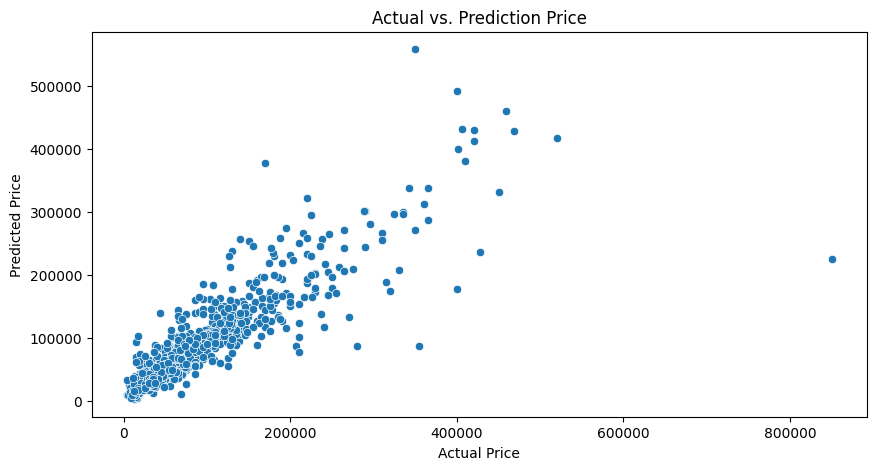

In [68]:
plt.figure(figsize=(10, 5))
plot = sns.scatterplot(x=y_test, y=y_pred_xgb_tuning).set(title='Actual vs. Prediction Price', 
                                               xlabel='Actual Price', 
                                               ylabel='Predicted Price');

Bisa dilihat dari grafik diatas memandingkan nilai dari actual *Price* nilai prediksi menggunaka XGBoost model dan parameter yang telah di tuning. 

**Insight**:

- Model yang dihasilkan tergolong cukup baik dan linear, dimana terlihat dari grafik di atas serta menghasilkan nilai small error metric values,(RMSE, MAE, MAPE) dan nilai R2 hampir mendekati 1 (0.8)
- Beberapa nilai actual price yang rendah di atas jika dibandingkan dengan nilai predicted price mengalami error, hal ini disebabkan karena banyaknya data dengan nilai **Price** yang rendah.
- Ketika Price more than 200000, distribusi plot mulai irregular. Kita dapat melihat bahwa kadang-kadang kita mempunyai harga yang diprediksi tinggi dan kadang-kadang rendah setelah 200000.

Berikut ini adalah parameter yang sangat mempengaruhi penentuan nilai **Price** pada model.

<Axes: title={'center': 'Feature Importances'}>

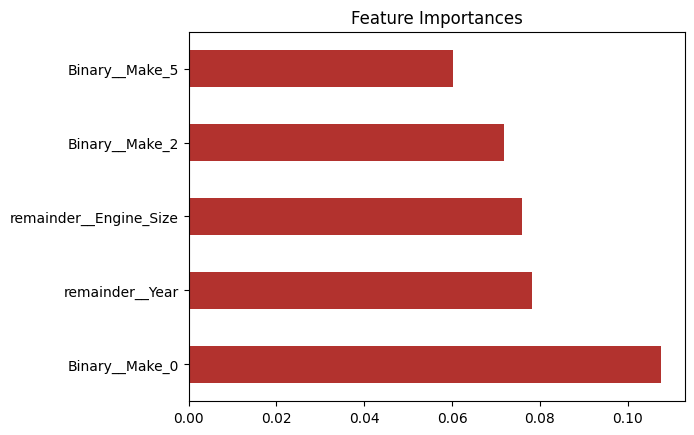

In [69]:
feature_imp = pd.Series(xgb_tuning['model'].feature_importances_, transformer.get_feature_names_out()).sort_values(ascending=False).head()
feature_imp.plot(kind='barh', title='Feature Importances', color='#b2322e')

Kita bisa lihat di atas *Make*, *Year*, dan *Engine_Size* Variabel yang sangat mempengaruhi model.

## 6. Conclusion and Recommendation

### **Conclusion**

In [70]:
score_after_tuning

,RMSE,MAE,MAPE,R2
XGB,35639.0,17467.6,0.3,0.8


Dalam Capstone Project ini, kita telah membangun sebuah model untuk memprediksi harga mobil bekas dengan beberapa kriteria yang telah ditentukkan di atas, dimana model ini dapat menjadi informasi pendukung yang berguna dalam menentukan harga jual dan beli mobil bekas bagi perusahaan maupun individu yang melakukan transaksi.

- Model terbaik yang digunakan disini adalah XGBoost Regressor.
- Hasil dari model menunjukkan bahwa fitur-fitur yang paling signifikan pengaruhnya adalah Make, Year dan Engine Size. 
- Performa model regresi dievaluasi menggunakan metrik RMSE (Root Mean Square Error), MAE (Mean Absolute Error), MAPE (Mean Absolute Percentage Error) dan R-Squared . Setelah melalui proses hyperparameter tuning, model yang dihasilkan tergolong cukup baik dan linear (XGBoost) dimana menghasilkan nilai small error metric values,(RMSE, MAE, MAPE) dan nilai R2 hampir mendekati 1 (0.8)
- Nilai RMSE memiliki makna bahwa ketika model digunakan untuk memprediksi harga mobil bekas, perkiraan harga rata-ratanya dapat memiliki selisih sekitar 35.639 Riyal (RMSE) atau 17467.6 (MAE) dari harga actual. Sedangkan nilai MAPE yang dihasilkan 0.3 yang menunjukkan error absolut pada Price yang diprediksi oleh model. Semakin kecil nilai MAPE berarti nilai taksiran semakin mendekati nilai sebenarnya.
- Sedangkan nilai R2 sebesar 0.8 berarti hubungan antara variabel dan variabel dependen dengan variabel independen sebesar 80%. Nilai R2 yang tinggi menunjukkan bahwa variabel independen mempunyai pengaruh yang besar terhadap variabel dependen
- Ketika Price more than 200000, distribusi plot mulai irregular. Kita dapat melihat bahwa kadang-kadang kita mempunyai harga yang diprediksi tinggi dan kadang-kadang rendah setelah 200000.

Model yang diperoleh masih memiliki potensi untuk ditingkatkan melalui proses-proses tertentu. Namun, untuk saat ini, kami berasumsi bahwa model sudah mencapai hasil yang diharapkan. Selain itu, dalam proses pembuatan model, diperlukan pengetahuan yang mendalam mengenai industri mobil untuk dapat mengembangkan pengembangan model yang lebih baik lagi.

### **Recommendation**


Hal-hal yang dapat dilakukan untuk mengembangkan model agar lebih baik lagi, seperti:

1. Mengecek prediksi mana saja yang memiliki nilai error yang tinggi, kita dapat mengelompokkan error tersebut ke dalam grup overestimation dan underestimation. Lalu kita bisa mengecek hubungan antara error tersebut dengan tiap variabel independen. Pada akhirnya kita dapat mengetahui sebenarnya variabel mana saja dan aspek apa yang menyebabkan model menghasilkan error yang tinggi, sehingga kita bisa melakukan training ulang.

2. Menambahkan fitur/variabel yang mengkategorikan jenis mobil (Sedan,SUV, dst / mobil klasik non klasik), warna mobil, dan lainnya. Dengan memasukkan fitur ini ke dalam model, kemungkinan besar akan meningkatkan akurasi prediksi harga mobil bekas.

3. Jika tersedia tambahan data yang signifikan, dapat mencoba menggunakan model yang lebih kompleks.

4. Analisis kolinearitas dengan menghitung nilai VIF pada setiap fitur. Diharapkan dapat diperoleh model yang lebih baik dengan menghilangkan fitur-fitur yang berkorelasi.



#### **Save Model**

In [71]:
import pickle
file_name = 'usedcar_SaudiArabia_XGB.sav'

pickle.dump(xgb_tuning, open(file_name, 'wb'))

#### **Load Model**

In [174]:

file_name = 'usedcar_SaudiArabia_XGB.sav'
loaded_model = pickle.load(open(file_name, 'rb'))